In [ ]:
# Retail Sales Analysis 📊
This project analyzes retail sales data to uncover trends in revenue growth, seasonality, top products, and customer behavior.


In [ ]:
**Dataset:** sales_data_sample.csv  
**Key Columns:**
- `ORDERDATE` → Date of order  
- `SALES` → Revenue from each transaction  
- `PRODUCTLINE` → Category of product  
- `CUSTOMERNAME` → Customer identifier  
- `COUNTRY` → Country where order was placed


In [7]:
import pandas as pd

#load dataset

df = pd.read_csv(
    r"C:\Users\apoor\Documents\Portfolio\Data Analysis\Retail Sales Analysis\Data\sales_data_sample.csv",
    encoding='latin1'
)


# Preview data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [8]:
# Check null values
print(df.isnull().sum())

# Drop rows or fill values
df = df.dropna()  # or use df.fillna(0)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [10]:
print(df.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [11]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Quick check
print(df['ORDERDATE'].head())

10   2004-02-20
21   2004-12-17
40   2004-07-19
47   2004-11-29
51   2005-03-09
Name: ORDERDATE, dtype: datetime64[ns]


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='ORDERDATE'>

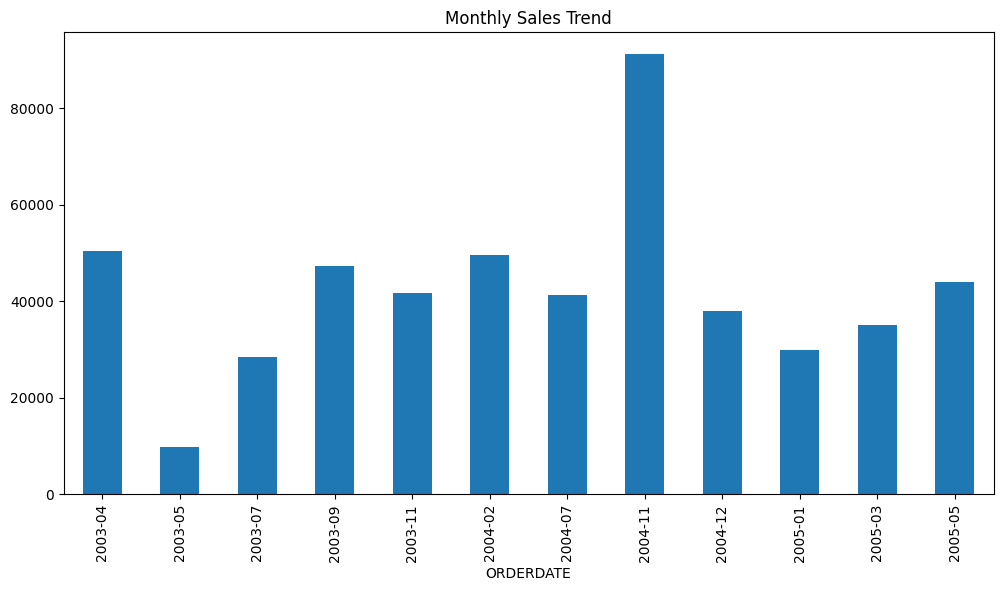

In [13]:
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period("M"))['SALES'].sum()
monthly_sales.plot(kind='bar', figsize=(12,6), title="Monthly Sales Trend")


In [ ]:
Here are some insights drawn from the Monthly Sales Trend chart:
1.	Seasonality / Spikes - Sales show significant seasonality, with a strong peak in November 2004, which is much higher than other months. This could indicate a festive or holiday-driven sales boost (e.g., year-end demand, promotions, or seasonal buying).
2.	Overall Growth - Comparing 2003 to 2004, sales volumes seem higher on average in 2004, indicating growth in business activity.
3.	Low Sales Months - Some months (e.g., May 2003, January 2005) show very low sales, suggesting possible off-season dips or weaker demand cycles.
4.	Consistent Mid-Level Performance - Several months across both years (like July 2003, September 2003, February 2004, July 2004, May 2005) show stable mid-range sales between ₹30,000–₹50,000, indicating a steady baseline.
5.	Volatility in Demand - The chart indicates fluctuations rather than smooth growth, which may point to irregular demand cycles, reliance on external factors (festivals, promotions, or economic trends), or dependency on bulk orders.
6.	Business Implications - If this pattern holds year over year, businesses can plan inventory, staffing, and marketing campaigns around the strong months (like November).
                          - Weak months could be targeted with promotional strategies to boost sales during downturns.


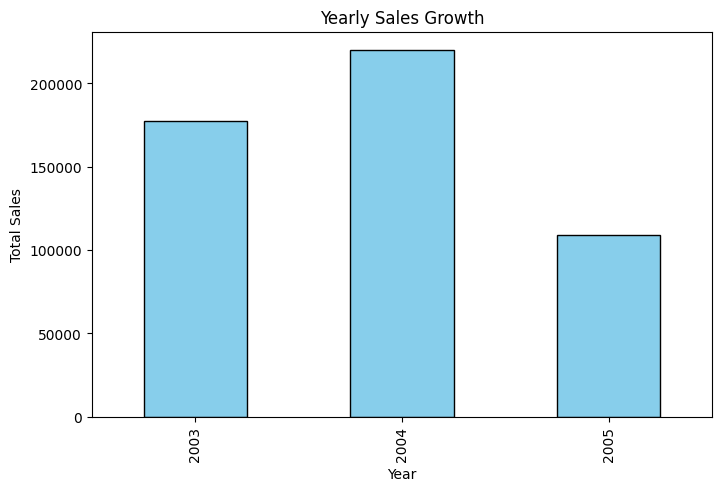

Yearly Sales:
ORDERDATE
2003    177516.81
2004    220061.86
2005    108983.85
Name: SALES, dtype: float64


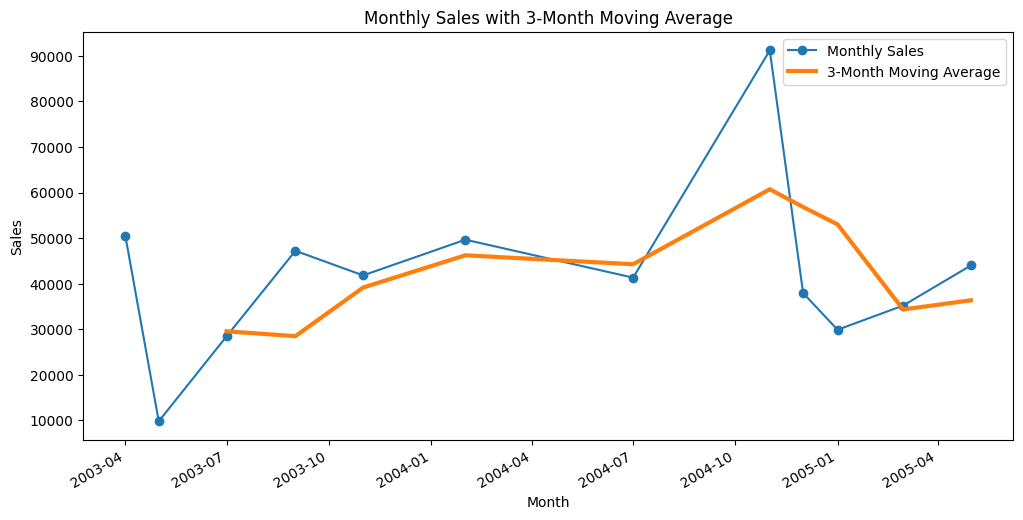

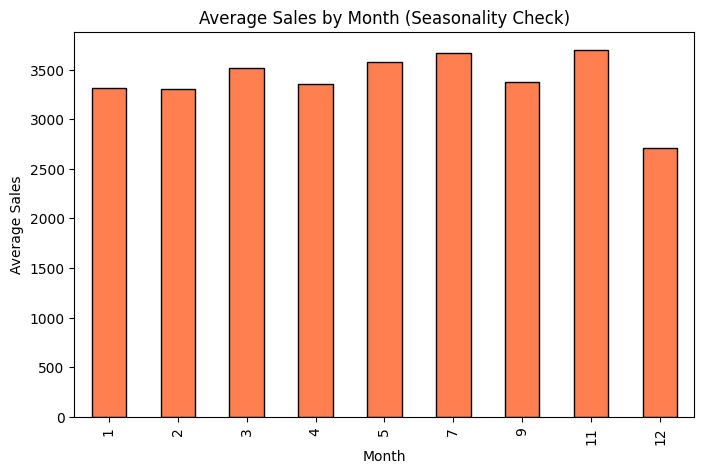

In [18]:
# -----------------------------
# 1. Yearly Sales Growth
# -----------------------------
import matplotlib.pyplot as plt
yearly_sales = df.groupby(df['ORDERDATE'].dt.year)['SALES'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Yearly Sales Growth")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

print("Yearly Sales:")
print(yearly_sales)

# -----------------------------
# 2. Moving Average (3-month)
# -----------------------------
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period("M"))['SALES'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_sales.plot(label="Monthly Sales", marker='o')
monthly_sales.rolling(3).mean().plot(label="3-Month Moving Average", linewidth=3)
plt.title("Monthly Sales with 3-Month Moving Average")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()

# -----------------------------
# 3. Seasonality Check
# -----------------------------
monthly_avg = df.groupby(df['ORDERDATE'].dt.month)['SALES'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Average Sales by Month (Seasonality Check)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


In [ ]:
________________________________________
📊 Yearly Sales Growth
•	2004 recorded the highest sales, surpassing 2003 and showing strong year-over-year growth.
•	2005 saw a significant decline in sales, possibly due to external market factors, reduced demand, or incomplete yearly data.
•	Overall, the trend indicates growth till 2004 followed by a drop, highlighting the need to investigate causes behind the decline.
________________________________________
📈 Monthly Sales with 3-Month Moving Average
•	Sales show strong seasonality with noticeable spikes around November 2004, likely tied to festive/holiday demand.
•	The moving average smooths out volatility and confirms that Q4 of 2004 was the peak sales period.
•	Certain months (e.g., early 2005) experienced a steep fall, suggesting possible post-holiday slump or operational disruptions.
________________________________________
📅 Average Sales by Month (Seasonality Check)
•	Sales are consistently higher in November and December, confirming a holiday-driven demand cycle.
•	Months like January, February, and September show comparatively lower sales, pointing to seasonal slowdowns.
•	This pattern emphasizes the importance of demand forecasting and inventory management before high-sales months.
________________________________________



<Axes: title={'center': 'Top Product Lines by Sales'}, xlabel='PRODUCTLINE'>

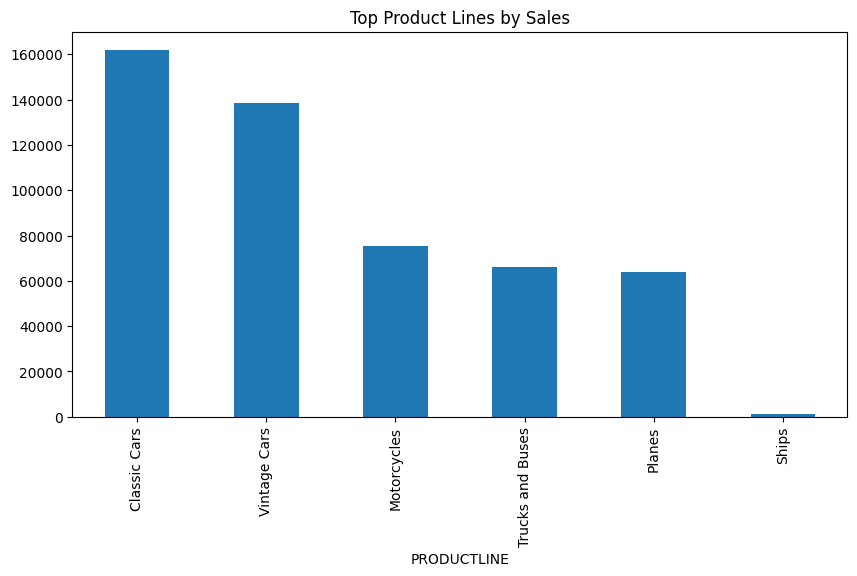

In [14]:
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', figsize=(10,5), title="Top Product Lines by Sales")


<Axes: title={'center': 'Top 10 Countries by Sales'}, xlabel='COUNTRY'>

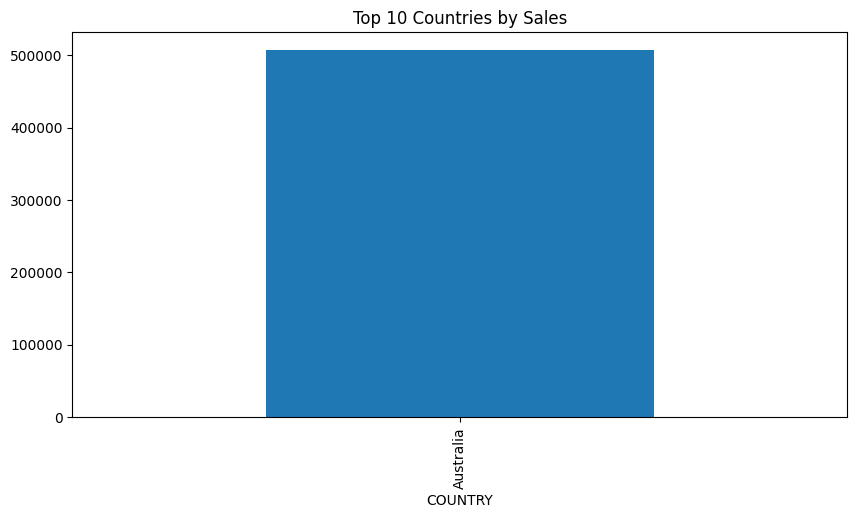

In [15]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(10,5), title="Top 10 Countries by Sales")


In [ ]:
### 🔎 Key Insights

* **Classic Cars** dominate sales, contributing the **highest revenue (\~160K)**, followed closely by **Vintage Cars (\~140K)**.
* Together, **Classic and Vintage Cars account for the majority of sales**, highlighting customer preference for collectible and luxury 
car models.
* **Motorcycles, Trucks & Buses, and Planes** form a mid-tier category, each generating **60K–75K in sales**, showing steady but secondary 
demand.
* **Ships contribute negligible sales**, making them the weakest-performing product line and a potential candidate for **re-evaluation or 
repositioning**.

---

✅ **Overall:** The business is heavily reliant on **Classic and Vintage Cars**, with other categories trailing significantly. Strategic focus
could be on **leveraging the car segment’s strength**, while either improving marketing/supply for weaker categories or reallocating resources.


<Axes: title={'center': 'Sales by Deal Size'}, ylabel='SALES'>

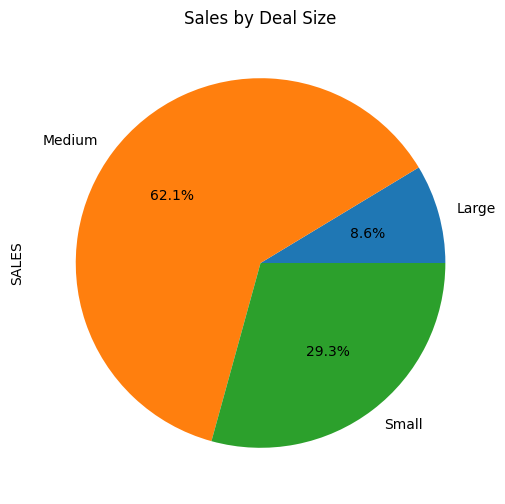

In [16]:
deal_size_sales = df.groupby('DEALSIZE')['SALES'].sum()
deal_size_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Sales by Deal Size")


In [ ]:
Here are the **insights** from your "Sales by Deal Size" pie chart:

---

### 🔎 Key Insights

* **Medium-sized deals dominate sales**, contributing the largest share at **62.1%**, making them the **primary growth driver**.
* **Small deals account for 29.3%** of sales, showing that they form an important secondary stream of revenue.
* **Large deals contribute only 8.6%**, indicating they are rare and have limited impact on overall sales.

---

✅ **Overall:** The company’s revenue heavily relies on **medium-sized deals**, while **large deals are under-penetrated**. 
    This suggests opportunities to either **scale small deals into medium ones** or **develop strategies to win more large deals** for
sustainable long-term growth.